In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("Documents/Telecom.csv")

In [133]:
df.head()

state  account length  area code phone number international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
0    KS             128        415     382-4657                 no             yes                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1  False
1    OH             107        415     371-7191                 no             yes                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13.7                 3               3.70                       1  False
2    NJ             137        415     358-1921                 no              no                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                7.32                12.2                 5               3.29                       0  False
3    OH              84        408     375-9999                yes              no                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                8.86                 6.6                 7               1.78                       2  False
4    OK              75        415     330-6626                yes              no                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                8.41                10.1                 3               2.73                       3  False

In [134]:
df.shape

(3333, 21)

In [135]:
#non_numerics

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [137]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [138]:
df['churn'] = df['churn'].astype('int64')
df['total intl calls'] = df['total intl calls'].astype('int64')

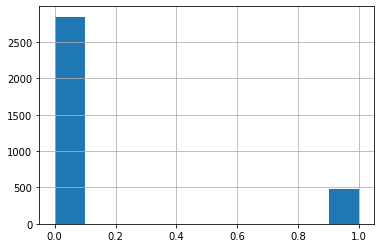

In [139]:
df['churn'].hist()

In [140]:
df.iloc[:10, 1:5]

account length  area code phone number international plan
0             128        415     382-4657                 no
1             107        415     371-7191                 no
2             137        415     358-1921                 no
3              84        408     375-9999                yes
4              75        415     330-6626                yes
5             118        510     391-8027                yes
6             121        510     355-9993                 no
7             147        415     329-9001                yes
8             117        408     335-4719                 no
9             141        415     330-8173                yes

In [141]:
df[df['state']=='OH'].sum()

state                     OHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOHOH...
account length                                                         7968
area code                                                             33736
phone number              371-7191375-9999336-7600370-9116410-3719421-97...
international plan        noyesnonoyesnonononononononoyesnononononononon...
voice mail plan           yesnononoyesyesnonononoyesyesyesyesnoyesnonono...
number vmail messages                                                   795
total day minutes                                                   14295.4
total day calls                                                        7771
total day charge                                                    2430.29
total eve minutes                                                   16102.4
total eve calls                                                        7894
total eve charge                                                    1368.73
total night 

In [142]:
(df[(df['state'] == 'OH') & (df['international plan']=='yes') & (df['churn']==1)]).sum()

state                                       OHOHOH
account length                                 316
area code                                     1333
phone number              379-1720348-1163369-8574
international plan                       yesyesyes
voice mail plan                            nonoyes
number vmail messages                           24
total day minutes                            725.7
total day calls                                276
total day charge                            123.37
total eve minutes                            731.5
total eve calls                                284
total eve charge                             62.18
total night minutes                          610.1
total night calls                              318
total night charge                           27.45
total intl minutes                              34
total intl calls                                17
total intl charge                             9.18
customer service calls         

In [143]:
df[(df['state'] == 'OH') & (df['international plan']=='yes') & (df['churn']==1)]['total intl calls'].sum()

17

In [144]:
df.loc[df.groupby(["state"])["total intl calls"].sum()].head()

state  account length  area code phone number international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
250    OR              33        415     380-2558                 no             yes                     29              157.4               99             26.76              117.9               80             10.02                279.2                 79               12.56                13.9                11               3.75                       4      1
376    DC             138        415     329-6562                 no              no                      0              170.5               87             28.99              118.2              116             10.05                187.9                111                8.46                11.2                 7               3.02                       2      0
258    KS              92        408     386-4170                yes              no                      0               62.6              111             10.64              180.6              126             15.35                221.7                 80                9.98                10.4                 2               2.81                       1      1
311    TX             110        415     399-8845                 no             yes                     38              236.3              102             40.17              195.9              112             16.65                183.5                 82                8.26                 9.7                 6               2.62                       1      0
151    NE             117        415     354-3436                 no              no                      0              102.8              119             17.48              206.7               91             17.57                299.0                105               13.46                10.1                 7               2.73                       1      0

In [145]:
pd.crosstab(df['area code'], df['state']=='OH')

state      False  True 
area code              
408          816     22
415         1615     40
510          824     16

### Data Visualization

In [146]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Univariate visualization

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

##### Quantitative Features

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

In [147]:
df['international plan'] = df['international plan'].map({'no':0, 'yes':1})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})

In [148]:
df.head()

state  account length  area code phone number  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
0    KS             128        415     382-4657                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1      0
1    OH             107        415     371-7191                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13.7                 3               3.70                       1      0
2    NJ             137        415     358-1921                   0                0                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                7.32                12.2                 5               3.29                       0      0
3    OH              84        408     375-9999                   1                0                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                8.86                 6.6                 7               1.78                       2      0
4    OK              75        415     330-6626                   1                0                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                8.41                10.1                 3               2.73                       3      0

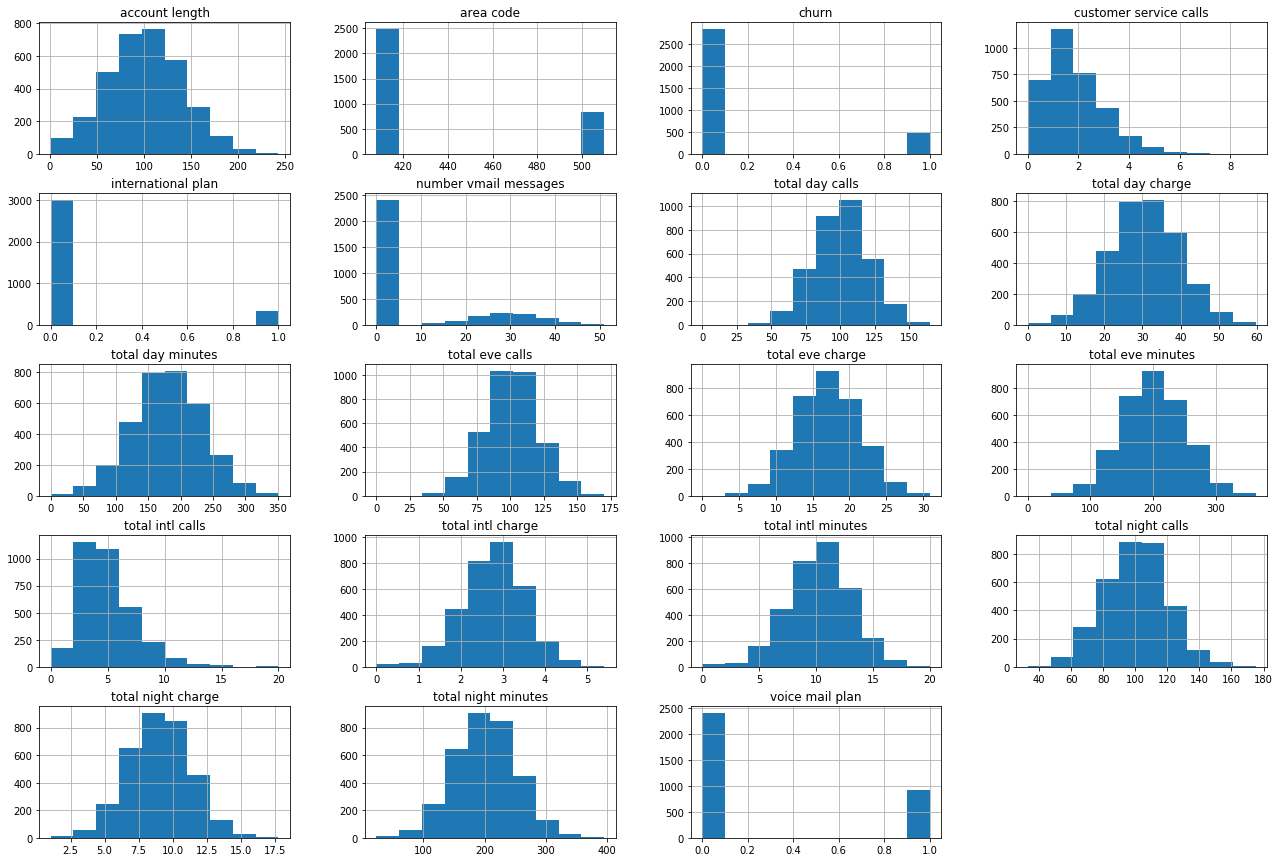

In [149]:
df.hist(figsize=(22,15));

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable Total day minutes is normally distributed, while Total intl calls is prominently skewed right (its tail is longer on the right).

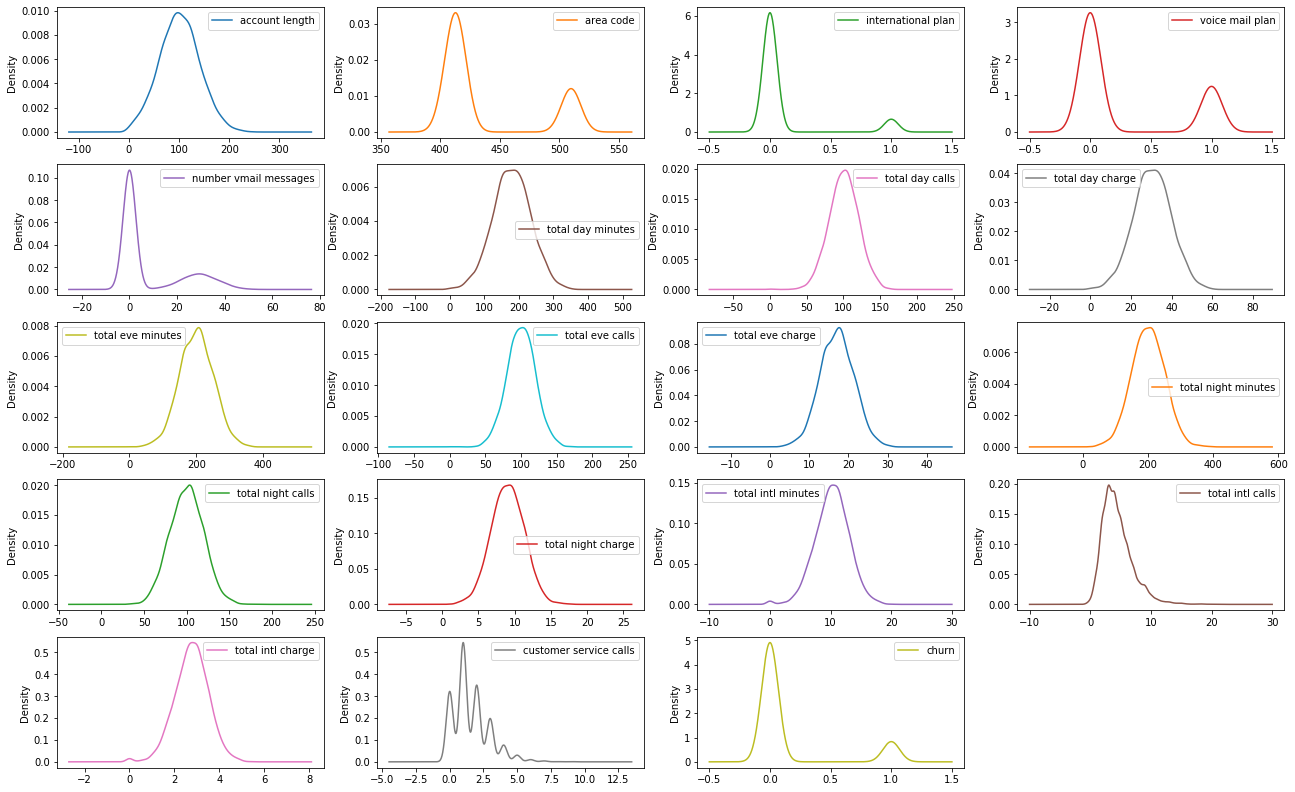

In [150]:
df.plot(kind='density', subplots=True, layout=(5,4),
        sharex=False, figsize=(22, 14));

Another way to check the distribution of the features is through density plots or kernel density plots. Kernel plots don't depend upon the size of the bins

Seaborn library has distplots for the same purpose.

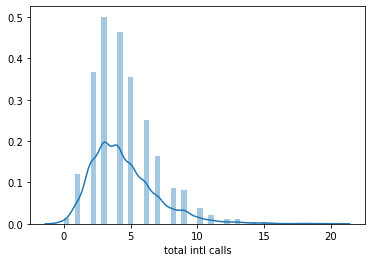

In [151]:
sns.distplot(df['total intl calls']);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

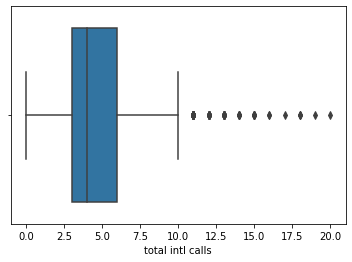

In [152]:
sns.boxplot(x='total intl calls', data=df);

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Its components are a box, whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the  25𝑡ℎ(Q1)  and  75𝑡ℎ(Q3)  percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval  (Q1−1.5⋅IQR,Q3+1.5⋅IQR) , where  IQR=Q3−Q1  is the interquartile range.


Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

#### Categorical and Binary Features

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. 

Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. 

If the values of a categorical variable are ordered, it is called ordinal.

In [153]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

To check whether our data is balanced or not we check the distribution of the target/dependent variable, using the value_counts()

The current dataset is a imbalanced dataset, i.e. categorical target variable classes are not represented equally.

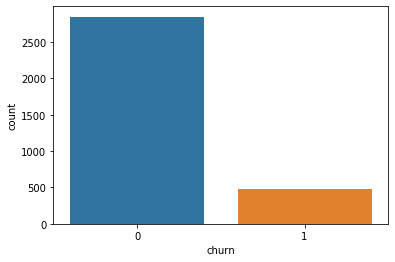

In [154]:
sns.countplot(x='churn', data=df)

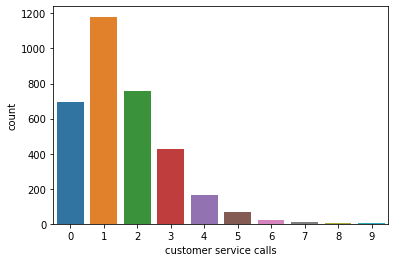

In [155]:
sns.countplot(x='customer service calls', data=df)

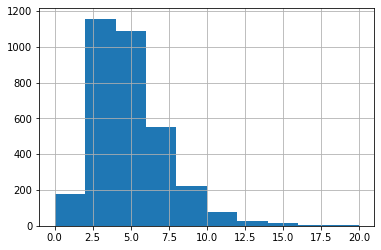

In [156]:
df['total intl calls'].hist();

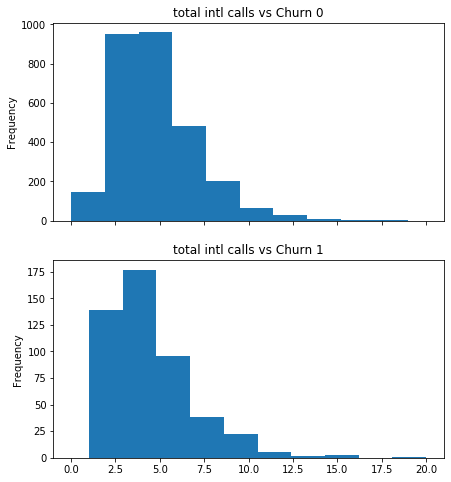

In [157]:
fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)
n = 0
for i, d in df.groupby('churn'):
    d['total intl calls'].plot(kind='hist',
                    bins=10,
                   ax=axes[n],
                   title=f'total intl calls vs Churn {i}')
    n+=1

#### Multivariate visualization

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. 

Multivariate plots allow us to see relationships between two and more different variables,

Correlation Matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

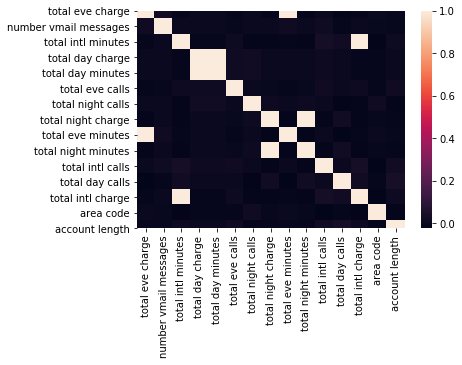

In [158]:
numeric = list(set(df.columns) - set(['state', 'churn', 'international plan', 
                                      'voice mail plan', 'customer service calls']))
sns.heatmap(df[numeric].corr())

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [159]:
([feature for feature in df.columns if 'charge' in feature])  #Another way to remove the correlated features.

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

In [160]:
numeric = list(set(numeric) - 
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

In [161]:
df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
number vmail messages    3333 non-null int64
total intl minutes       3333 non-null float64
total eve calls          3333 non-null int64
total day minutes        3333 non-null float64
total night calls        3333 non-null int64
total eve minutes        3333 non-null float64
total night minutes      3333 non-null float64
total intl calls         3333 non-null int64
phone number             3333 non-null object
total day calls          3333 non-null int64
area code                3333 non-null int64
account length           3333 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 312.6+ KB


#### Scatter Plot

 The scatter plot displays the values of two numerical variables as Cartesian Coordinates in 2D space and 3D space.

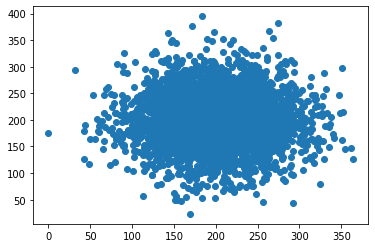

In [162]:
plt.scatter(df['total eve minutes'], df['total night minutes']);

This shows an uninteresting picture of two normally distributed variables, it looks like these two features are uncorrelated due to the eclipse like shape is aligned to the axis.

<Figure size 1152x864 with 0 Axes>

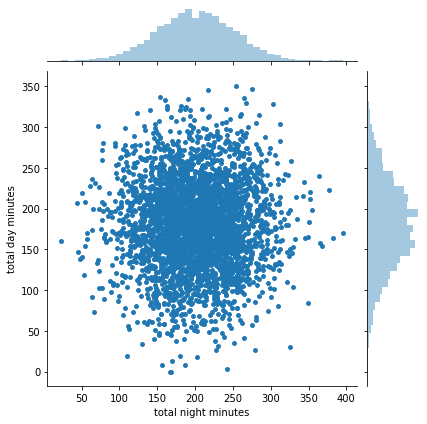

In [163]:
plt.figure(figsize=(16,12))
sns.jointplot(x='total night minutes', y='total day minutes', data = df, kind='scatter', s=15
              , linewidth=1)

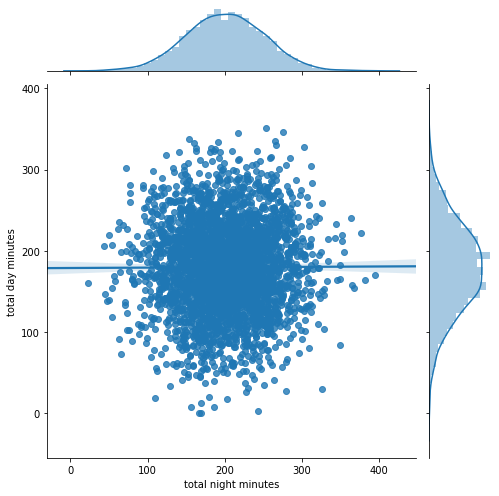

In [164]:
sns.jointplot(x='total night minutes', y='total day minutes', data = df, kind='reg', size=7)

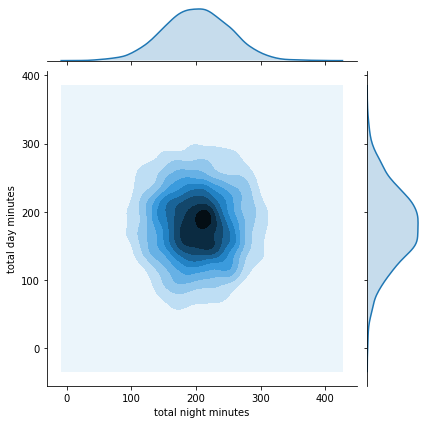

In [165]:
sns.jointplot(x='total night minutes', y='total day minutes', data = df, kind='kde', s=40, linewidth=1)

In some cases, we may want to plot a scatterplot matrix such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

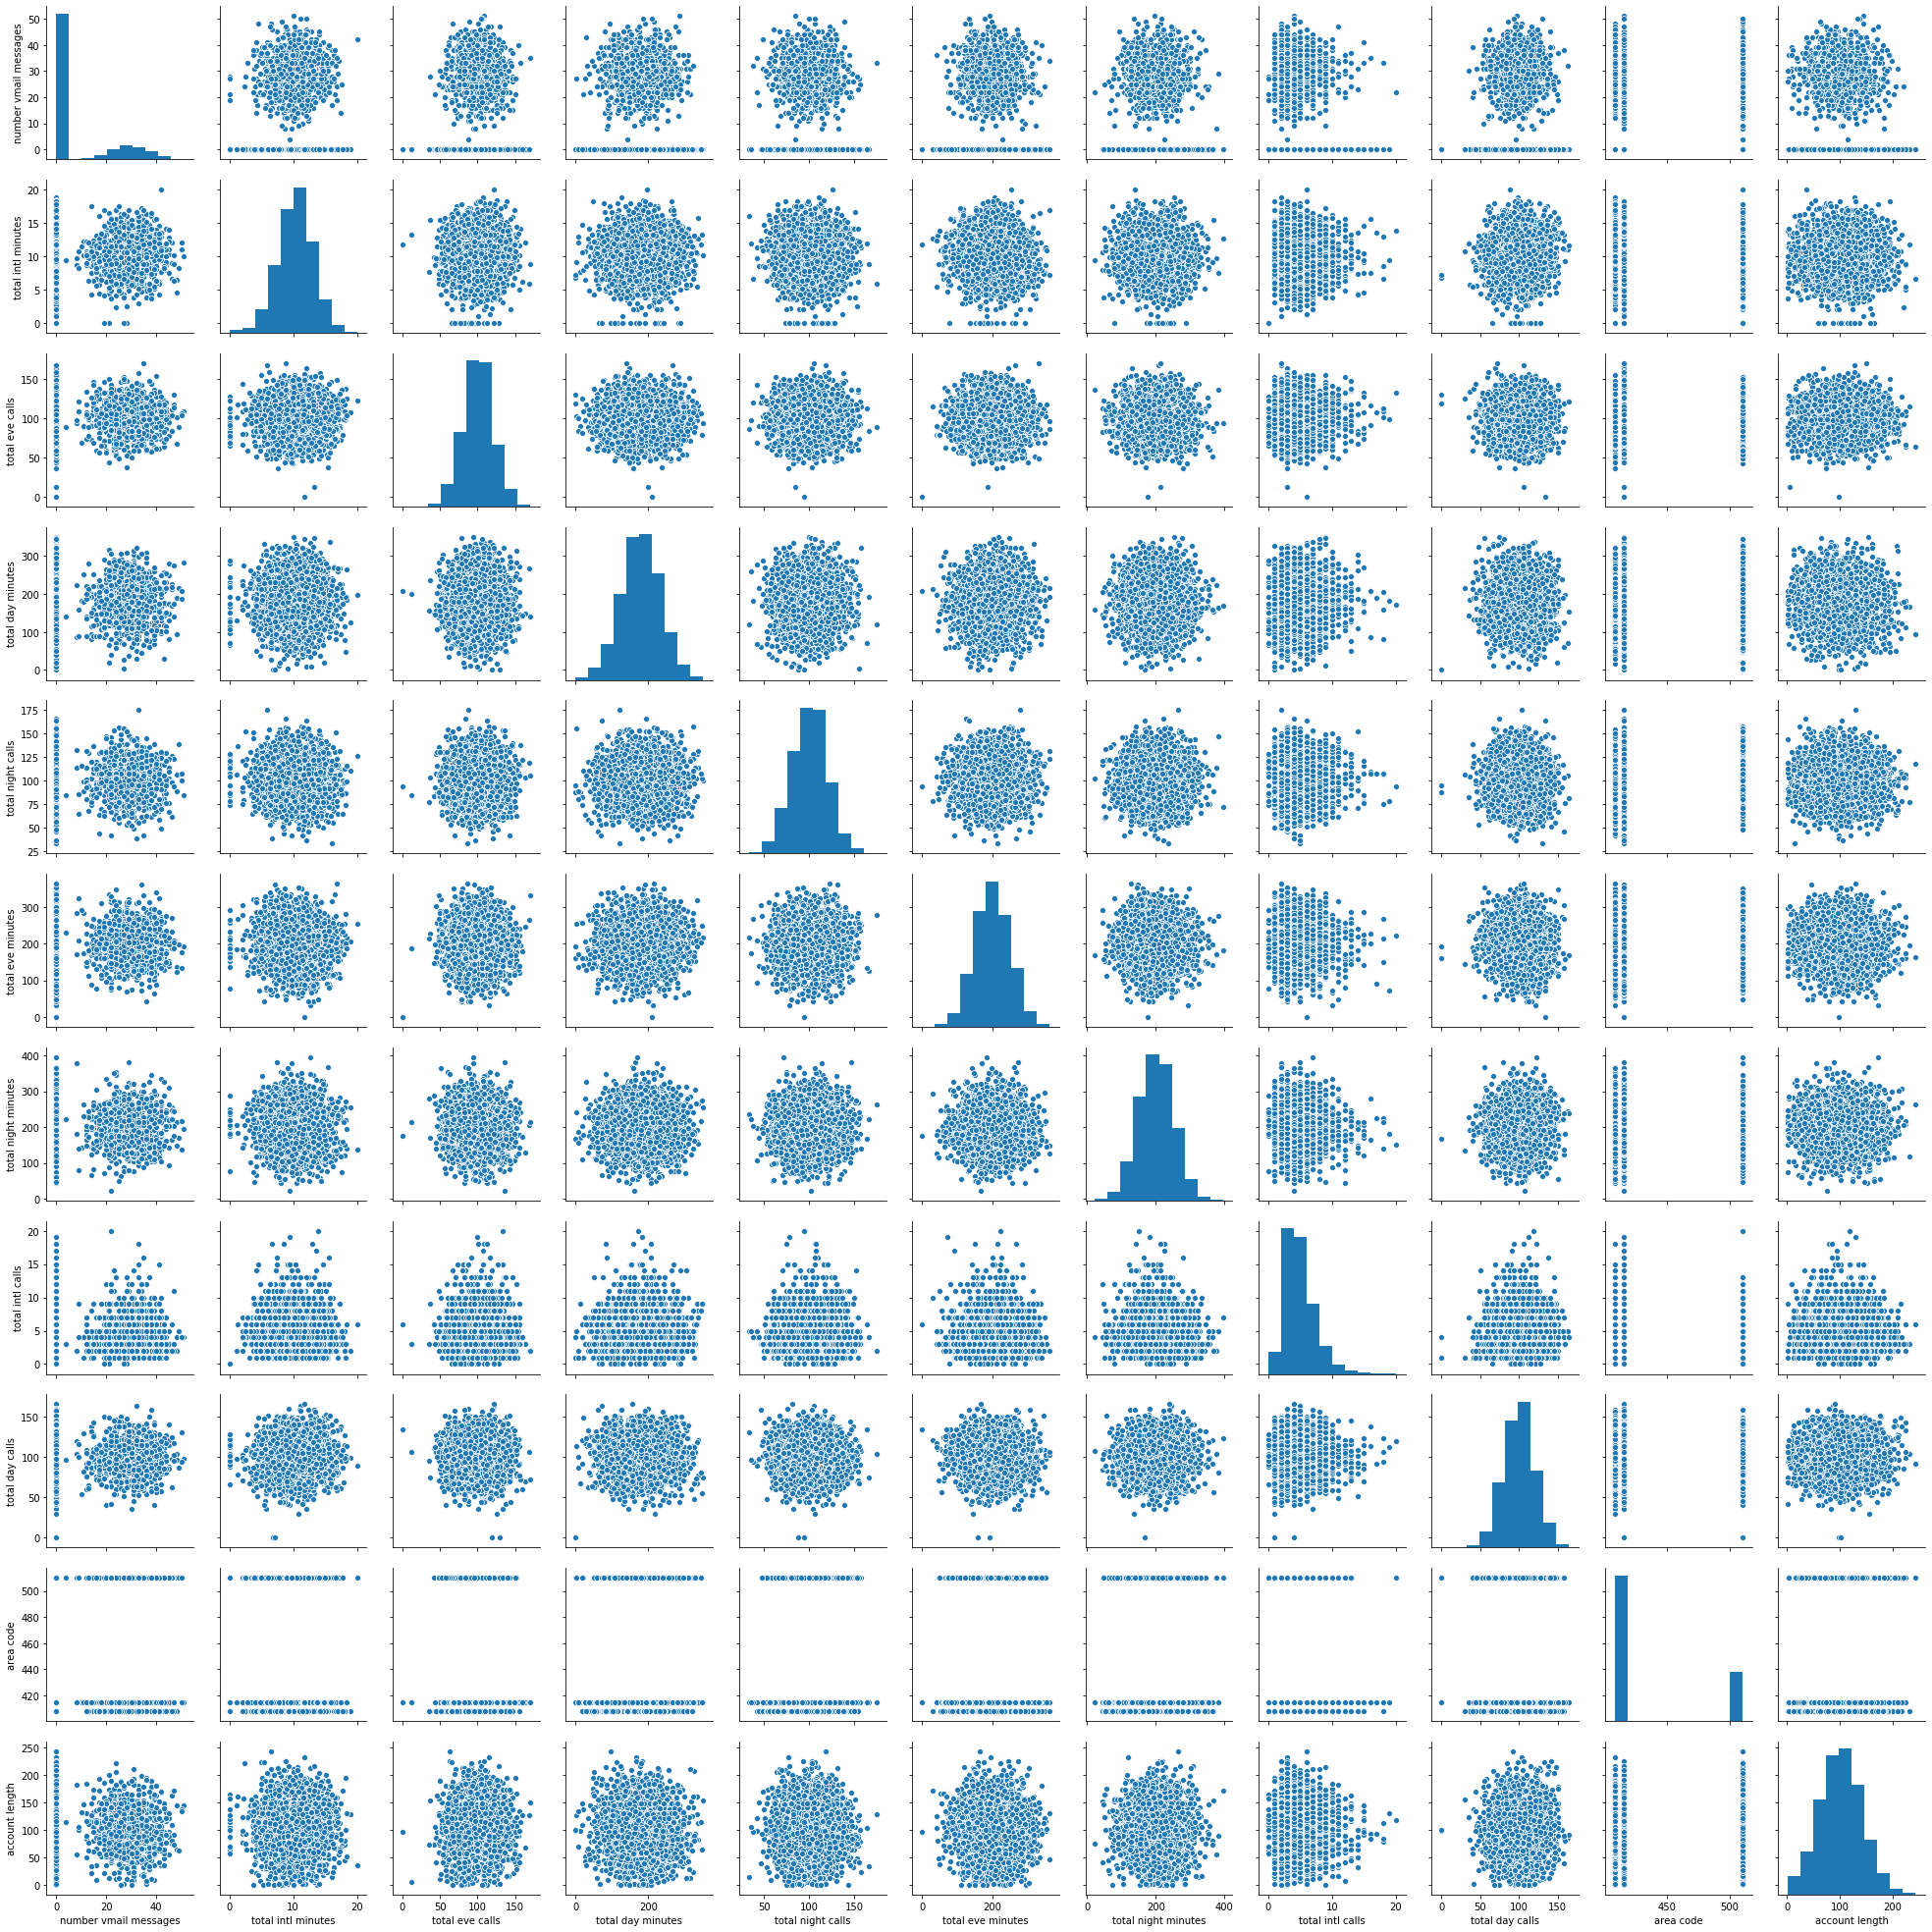

In [166]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numeric]);

 df1 = df.select_dtypes([np.int, np.float])

n=len(df1.columns)
#fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=True)
for i in range(n):
    #plt.sca(ax[i])
    col = df1.columns[i]
    plt.figure(figsize=(16, 12))
    plt.xticks(rotation=90)
    plt.title(col +' count plot')
    sns.countplot(x = df1[col]);

#### Quantitative vs. Categorical

To gain new insights for churn prediction from the interactions between the numerical and categorical features, we look at how the input variables are related to the target variable Churn.

To see how the numerical features affect the target variable, we can color or size code to indicate the dependent variable.

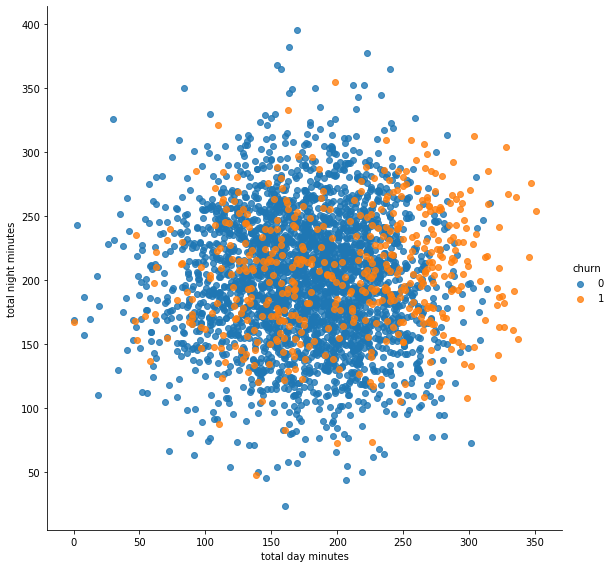

In [167]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False, size=8);

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))
for idx, feat in enumerate(numeric):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
fig.tight_layout();
    

When we want to analyze a quantitative variable in two categorical variable at once, there is a suitable function for this in seaborn called as catplot().

In [168]:
sns.__version__  #Catplot works for Seaborn version 0.9.0 and above

'0.9.0'

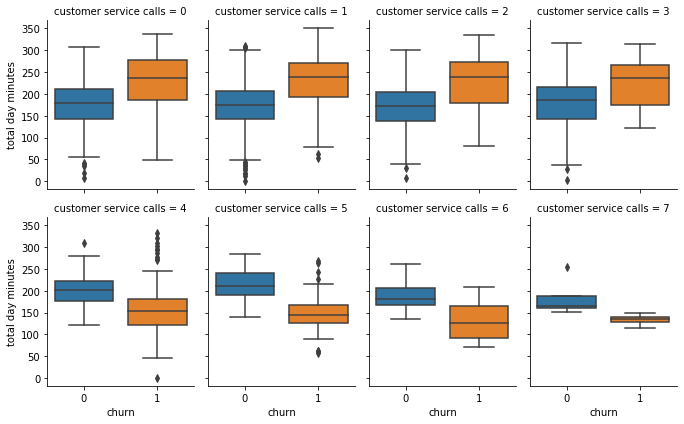

In [169]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls',
               data=df[df['customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

#### Categorical vs. Categorical Feature

 Understanding the relationship between the ordinal feature and the target categorical feature.

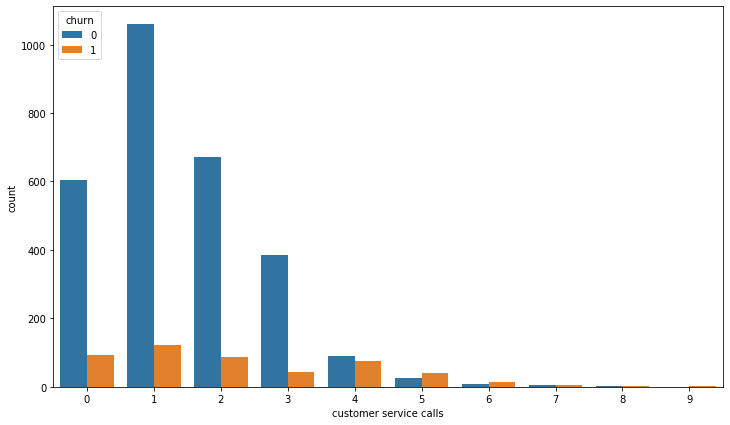

In [170]:
plt.figure(figsize=(12,7))
sns.countplot(x='customer service calls', hue='churn', data=df);

An observation: churn rate increases significantly after 4 or more customer service calls

Understanding the relation b/w target cat variable and other cat variables such as voice mails and international calls

In [171]:
df.columns

Index(['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'], dtype='object')

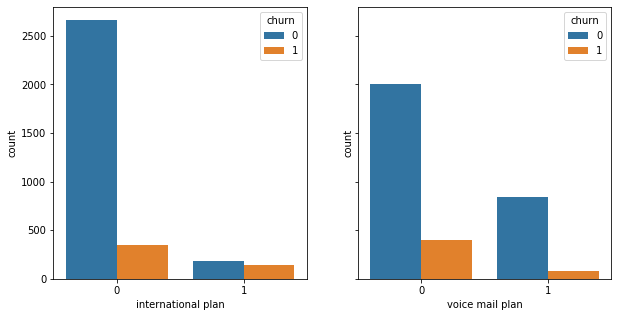

In [172]:
_, axes = plt.subplots(1,2, sharey = True, figsize=(10,5))
sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0])
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

#### Contingency Table

Contingency table is a cross tabulation, which shows a multivariate frequency distribution of categorical variables in tabular form.
In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row

In [173]:
pd.crosstab(df['state'], df['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY
churn                                                                                                                                                                                                            
0      49  72  44  60  25  57  62  49  52  55  46  50  41  64  53  62  57  51  47  54  53  49  57  69  56  51  54  57  56  56  47  50  56  52  68  68  52  67  37  59  46  52  48  54  62  72  65  52  71  96  68
1       3   8  11   4   9   9  12   5   9   8   8   3   3   9   5   9  13   8   4  11  17  13  16  15   7  14  14  11   6   5   9  18   6  14  15  10   9  11   8   6  14   8   5  18  10   5   8  14   7  10   9

In [174]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state        NJ        CA    TX        MD        SC        MI        MS        NV        WA        ME        MT   AR        KS        NY        MN        PA        MA        CT        NC        NH        GA        DE        OK        OR        UT        CO        KY        SD        OH        FL        IN        ID        WY        MO        VT   AL        NM        ND       WV       TN        DC        RI        WI        IL        NE        LA        IA        VA      AZ        AK        HI
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385  0.212121  0.212121  0.209677  0.205882  0.2  0.185714  0.180723  0.178571  0.177778  0.169231  0.162162  0.161765  0.160714  0.148148  0.147541  0.147541  0.141026  0.138889  0.136364  0.135593  0.133333  0.128205  0.126984  0.126761  0.123288  0.116883  0.111111  0.109589  0.1  0.096774  0.096774  0.09434  0.09434  0.092593  0.092308  0.089744  0.086207  0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604

We need to confirm where the mean for these states in actually right, or just based on the property of our particular datasets, to confirm this we need to do a Matthews and cramer correlation hypothesis, to be continued..

#### t-SNE

t-SNE: t-distributed Stochastic Neighbor Embedding. The idea behind this is to find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but mostly 2D) such that those points that were far apart in the initial n-d space will end up far apart on the plane. Those that were close would remain close to each other.

Neighbor embedding is a search for a new and less-dimensional data representation that preserves neighborship of examples.

In [187]:
df.head()

state  account length  area code phone number  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
0    KS             128        415     382-4657                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1      0
1    OH             107        415     371-7191                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13.7                 3               3.70                       1      0
2    NJ             137        415     358-1921                   0                0                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                7.32                12.2                 5               3.29                       0      0
3    OH              84        408     375-9999                   1                0                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                8.86                 6.6                 7               1.78                       2      0
4    OK              75        415     330-6626                   1                0                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                8.41                10.1                 3               2.73                       3      0

In [188]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

We will leave out the state and churn features and convert the other binary feature Yes/No values into numeric values using pandas.Series.map(), quite efficient.

In [189]:
X=df.drop(['churn', 'state', 'phone number'], axis=1)

In [190]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [191]:
X.head()

account length  area code  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls
0             128        415                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1
1             107        415                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13.7                 3               3.70                       1
2             137        415                   0                0                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                7.32                12.2                 5               3.29                       0
3              84        408                   1                0                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                8.86                 6.6                 7               1.78                       2
4              75        415                   1                0                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                8.41                10.1                 3               2.73                       3

In [192]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

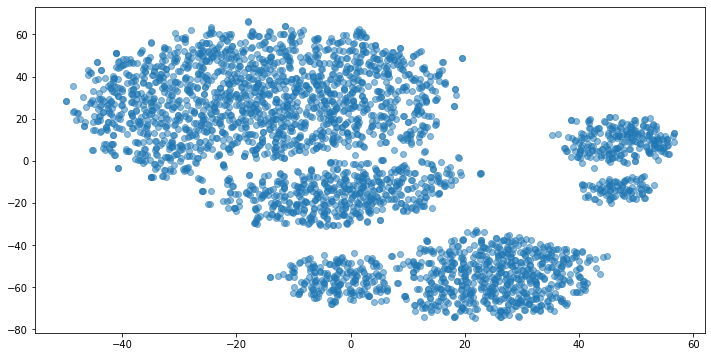

In [196]:
plt.figure(figsize=(12,6))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

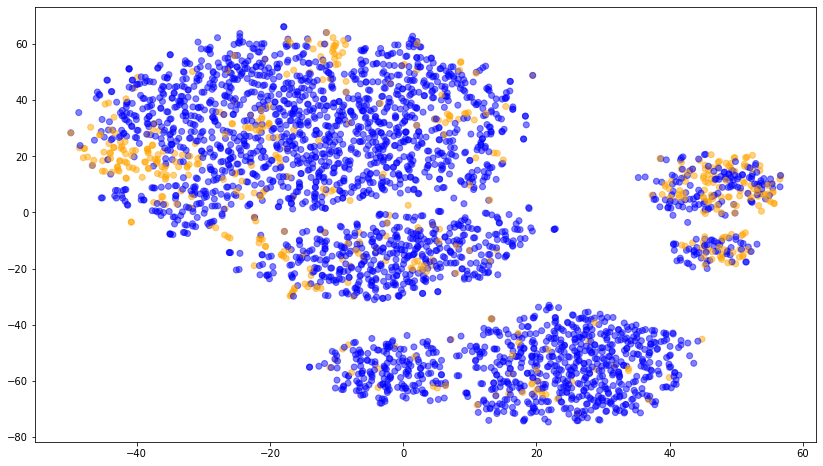

In [200]:
plt.figure(figsize=(14, 8))
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['churn'].map({0:'blue', 1:'orange'}), alpha=0.5);

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

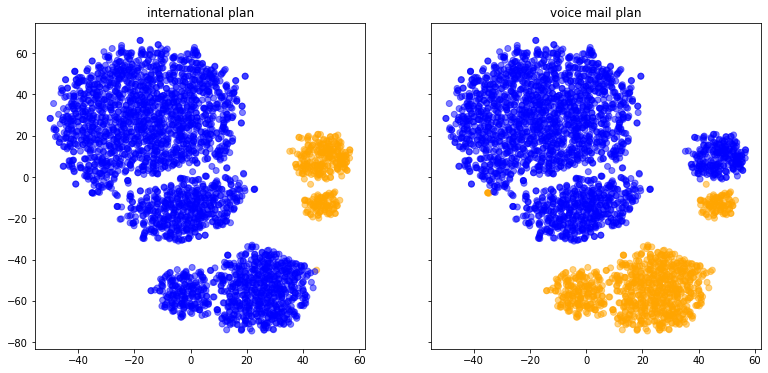

In [202]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(13, 6))
for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:,0], tsne_repr[:,1], c=df[name].map({1:'orange', 0:'blue'}), alpha=0.5);
    axes[i].set_title(name);

This shows that many dis-satisfied customers who canceled their subscription are crowded together in one cluster representating the people with the international plan.

Disadvantages of t-SNE

High computational complexity. If there are large number of observations then we should try Multicore-tSNE instead.

The plot can change a great deal depending on the random seed, which complicates interpretation. In general, one shouldn't make any far-reaching conclusions based on such graphs because it can equate to plain guessing, though at times t-SNE graph can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Ocassionally, using t-SNE, you can get a really good intuition for the data.

# New Data 

Graphics in SVG format are more sharp and legible

In [203]:
%config InlineBackend.figure_format = 'svg'

In [204]:
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap']='viridis'

In [205]:
df = pd.read_csv('Documents/video_game_sales.csv').dropna()

In [207]:
df.shape

(6825, 16)

In [209]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  User_Count Developer Rating
0             Wii Sports      Wii           2006.0    Sports  Nintendo     41.36     28.96      3.77         8.45         82.53          76.0          51.0          8       322.0  Nintendo      E
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo     15.68     12.76      3.79         3.29         35.52          82.0          73.0        8.3       709.0  Nintendo      E
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo     15.61     10.93      3.28         2.95         32.77          80.0          73.0          8       192.0  Nintendo      E
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo     11.28      9.14      6.50         2.88         29.80          89.0          65.0        8.5       431.0  Nintendo      E
7               Wii Play      Wii           2006.0      Misc  Nintendo     13.96      9.18      2.93         2.84         28.92          58.0          41.0        6.6       129.0  Nintendo      E

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


Some of the numeric features are detected as 'object' type thus, need to explicitly convert to float or int.

In [232]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [233]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Developer Rating
0             Wii Sports      Wii             2006    Sports  Nintendo     41.36     28.96      3.77         8.45         82.53          76.0            51         8.0         322  Nintendo      E
2         Mario Kart Wii      Wii             2008    Racing  Nintendo     15.68     12.76      3.79         3.29         35.52          82.0            73         8.3         709  Nintendo      E
3      Wii Sports Resort      Wii             2009    Sports  Nintendo     15.61     10.93      3.28         2.95         32.77          80.0            73         8.0         192  Nintendo      E
6  New Super Mario Bros.       DS             2006  Platform  Nintendo     11.28      9.14      6.50         2.88         29.80          89.0            65         8.5         431  Nintendo      E
7               Wii Play      Wii             2006      Misc  Nintendo     13.96      9.18      2.93         2.84         28.92          58.0            41         6.6         129  Nintendo      E

In [234]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], dtype='object')

In [235]:
useful_cols = set(df.columns)-set(['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [236]:
df[useful_cols].head()

Global_Sales  User_Count                   Name Rating  Critic_Count  User_Score  Year_of_Release  Critic_Score     Genre Developer Platform
0         82.53         322             Wii Sports      E            51         8.0             2006          76.0    Sports  Nintendo      Wii
2         35.52         709         Mario Kart Wii      E            73         8.3             2008          82.0    Racing  Nintendo      Wii
3         32.77         192      Wii Sports Resort      E            73         8.0             2009          80.0    Sports  Nintendo      Wii
6         29.80         431  New Super Mario Bros.      E            65         8.5             2006          89.0  Platform  Nintendo       DS
7         28.92         129               Wii Play      E            41         6.6             2006          58.0      Misc  Nintendo      Wii

Using Plot() function on dataframe to visualize the data, plot() is from matplotlib.

In [242]:
df.groupby(['Year_of_Release'])['Global_Sales'].sum()
#gp.apply(lambda x: x[x['Year_of_Release']>'2000'])

Year_of_Release
1985      0.03
1988      0.03
1992      0.03
1994      1.27
1996     20.10
1997     35.01
1998     43.18
1999     51.17
2000     81.24
2001    253.88
2002    288.84
2003    255.35
2004    321.78
2005    334.32
2006    416.72
2007    456.23
2008    489.12
2009    459.85
2010    412.96
2011    383.69
2012    291.93
2013    267.17
2014    192.43
2015    159.16
2016     91.56
Name: Global_Sales, dtype: float64

gp = df.groupby(['Year_of_Release'])['Global_Sales'].sum()
gp.filter(lambda x: x[x['Year_of_Release']>2000])

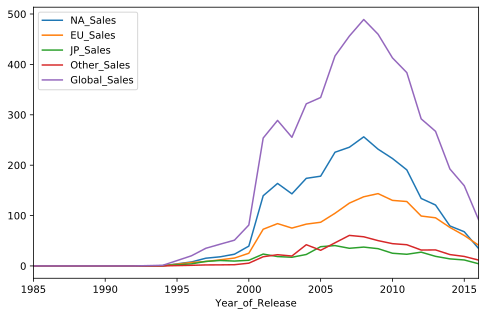

In [245]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot();

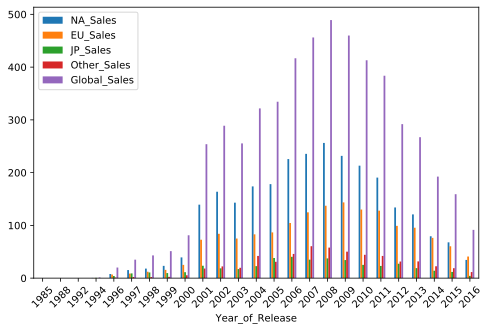

In [246]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

'pairplot()' may become very slow with the SVG format

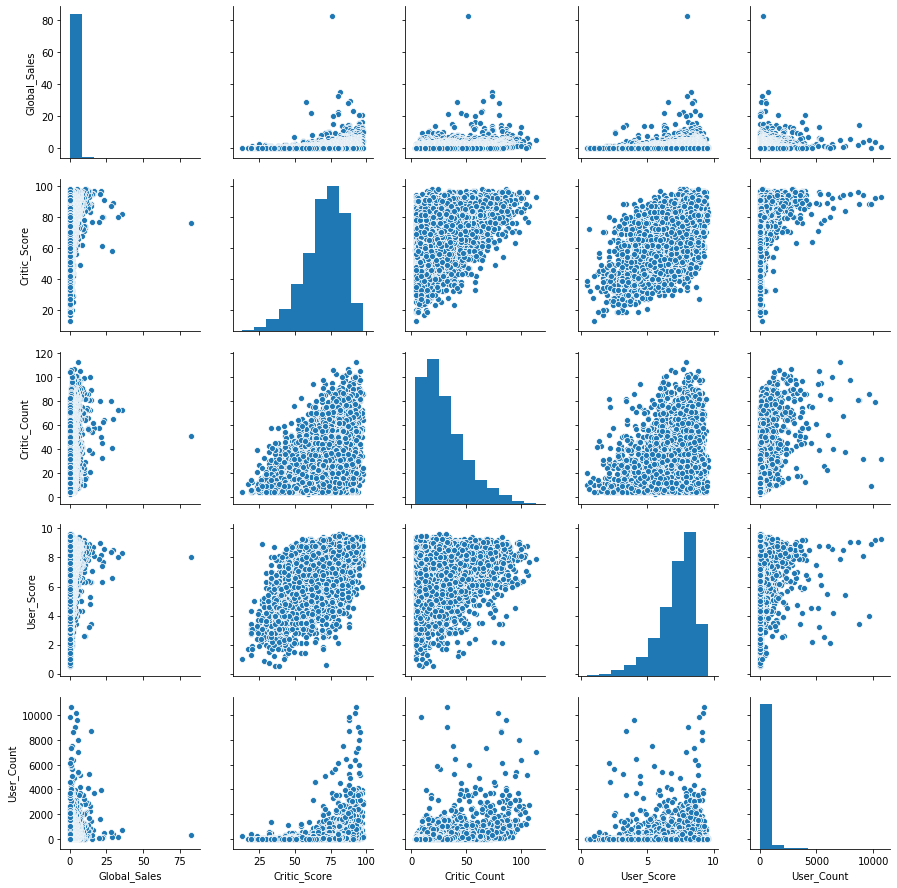

In [250]:
#%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]);

In sns pairplot, the distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pair of features.

#### Dist Plot

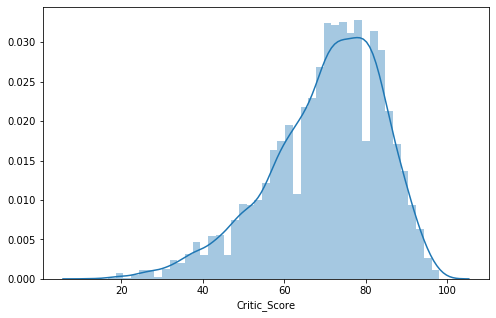

In [252]:
sns.distplot(df['Critic_Score']);

#### Joint Plot

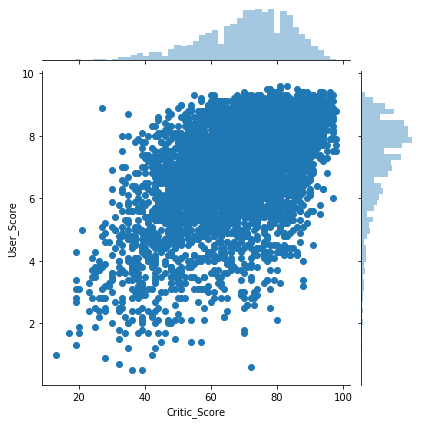

In [254]:
    sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='scatter');

#### Box Plot

In [255]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values

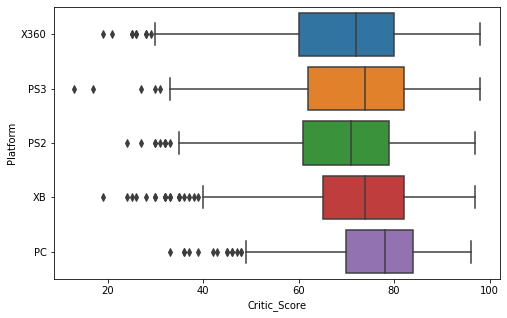

In [257]:
sns.boxplot(y="Platform", x="Critic_Score", data=df[df['Platform'].isin(top_platforms)], orient="h");

#### Heatmap()

It is worth spending a bit more time to discuss how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length determined by the  25%(Q1)  and  75%(Q3)  percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval  (Q1−1.5⋅IQR,Q3+1.5⋅IQR) , where  IQR=Q3−Q1  is the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually.

In [260]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], dtype='object')

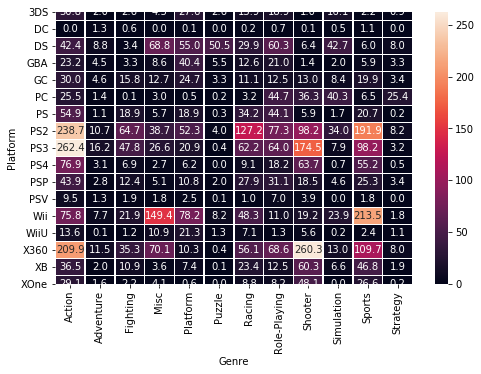

In [265]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

In [266]:
print(platform_genre_sales)

Genre     Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  Role-Playing  Shooter  Simulation  Sports  Strategy
Platform                                                                                                                    
3DS        30.81       2.00      2.63    4.48     27.61    2.63   13.89         18.94     1.02       16.08    2.20      0.94
DC          0.00       1.33      0.56    0.00      0.12    0.00    0.20          0.68     0.05        0.52    1.09      0.00
DS         42.43       8.83      3.37   68.82     55.02   50.50   29.93         60.31     6.40       42.71    6.01      8.00
GBA        23.21       4.54      3.28    8.59     40.36    5.47   12.60         21.00     1.40        2.03    5.93      3.34
GC         29.99       4.56     15.81   12.72     24.67    3.31   11.09         12.48    13.04        8.39   19.91      3.45
PC         25.45       1.42      0.13    3.02      0.46    0.19    3.18         44.68    36.34       40.34    6.54     25.37


#### Plotly

In [287]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Line Plot

In [288]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

In Plotly, Figure is the main class, it consists of the data(array of lines called traces) and the style (represented by the layout object).
In simplest case, you may call the iplot function to return only traces.
The show_link parameter toggles the visibility of the links leading to the online platform plot.ly in your charts, to enable the link show_link=True.

In [289]:
#Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index,
                    y=years_df['Global_Sales'],
                    name='Global_Sales')

#Create a line (trace) for the number of games released
trace1 = go.Scatter(x=years_df.index,
                   y=years_df['Number_of_Games'],
                   name='Number of games released')

#Define the data array
data = [trace0, trace1]

#Set the title
layout = {'title': 'Statistics for video games'}

#Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True, image_width=1000, image_height=650)

As an option you can save the plot in an html file

In [290]:
#plotly.offline.plot(fig, filename='years_stats.html')

#### Bar Chart 

Let us use the bar chart to compare the market share of different gaming platforms broken down by the number of new releases and by total revenue.

In [291]:
platform_df = df.groupby('Platform')[['Global_Sales']].sum().join(df.groupby('Platform')[['Name']].count())
platform_df.columns = ['Global_Sales', 'Number_of_Games']
platform_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [292]:
#Creating a bar for global sales
trace0 = go.Bar(x=platform_df.index,
               y=platform_df['Global_Sales'],
               name='Global_Sales')

#Creating a bar for the number of games released
trace1 = go.Bar(x=platform_df.index,
               y=platform_df['Number_of_Games'],
               name='Number of game released')

#Get together the data and style objects
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

#Create a 'Figure' and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig)


#### Box Plot

plotly also supports box plots. Let's consider the distribution of critics' rating by the genre of the game.

In [294]:
data = []

#Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
    go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
iplot(data)